# Importing Packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pylab
#for dickey-fuller test
import statsmodels.tsa.stattools as sts
#to check seasonality in dataset
from statsmodels.tsa.seasonal import seasonal_decompose
#for autocorrelation 
import statsmodels.graphics.tsaplots as sgt
#for estimation of future values
#arima model
from statsmodels.tsa.arima.model import ARIMA
#sarima model 
from statsmodels.tsa.statespace.sarimax import SARIMAX

sns.set()

#for chi square test
from scipy.stats.distributions import chi2


#for model evaluation
from sklearn.metrics import mean_squared_error
#for warnings
import warnings

warnings.filterwarnings("ignore")

Data from 1990 to 2005:

In [2]:
df= pd.read_csv("Tempreture_1901_2016_Pakistan.csv")

# Data Pre-Processing:

In [3]:
df.shape

(1392, 3)

In [4]:
df.head()

,Temperature - (Celsius),Year,Month
0,7.72768,1901,January
1,8.93600,1901,February
2,16.96320,1901,March
3,21.27410,1901,April
4,26.04970,1901,May


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature - (Celsius)  1392 non-null   float64
 1    Year                    1392 non-null   int64  
 2   Month                    1392 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 32.8+ KB


In [6]:
df.rename(columns={' Year': 'Year'},inplace= True)

In [7]:
df['Year']= df['Year'].astype(str)

In [8]:
df['Month'] = df['Month'].astype(str)

In [9]:
df['Date'] = df['Month']+ '-' + df['Year']


In [10]:
df.head()

,Temperature - (Celsius),Year,Month,Date
0,7.72768,1901,January,January-1901
1,8.93600,1901,February,February-1901
2,16.96320,1901,March,March-1901
3,21.27410,1901,April,April-1901
4,26.04970,1901,May,May-1901


Deleted Month and Year:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature - (Celsius)  1392 non-null   float64
 1   Year                     1392 non-null   object 
 2   Month                    1392 non-null   object 
 3   Date                     1392 non-null   object 
dtypes: float64(1), object(3)
memory usage: 43.6+ KB


In [12]:
df.isnull().sum()

Temperature - (Celsius)    0
Year                       0
Month                      0
Date                       0
dtype: int64

In [13]:
df['Date']= pd.to_datetime(df['Date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Temperature - (Celsius)  1392 non-null   float64       
 1   Year                     1392 non-null   object        
 2   Month                    1392 non-null   object        
 3   Date                     1392 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 43.6+ KB


In [15]:
df.head()

,Temperature - (Celsius),Year,Month,Date
0,7.72768,1901,January,1901-01-01
1,8.93600,1901,February,1901-02-01
2,16.96320,1901,March,1901-03-01
3,21.27410,1901,April,1901-04-01
4,26.04970,1901,May,1901-05-01


**Lets set Date as Index to make it proper Time Series**

In [16]:
df.set_index('Date',inplace=True)

In [17]:
df.head()

,Temperature - (Celsius),Year,Month
Date,,,
1901-01-01,7.72768,1901,January
1901-02-01,8.93600,1901,February
1901-03-01,16.96320,1901,March
1901-04-01,21.27410,1901,April
1901-05-01,26.04970,1901,May


#### Plotting the Data:

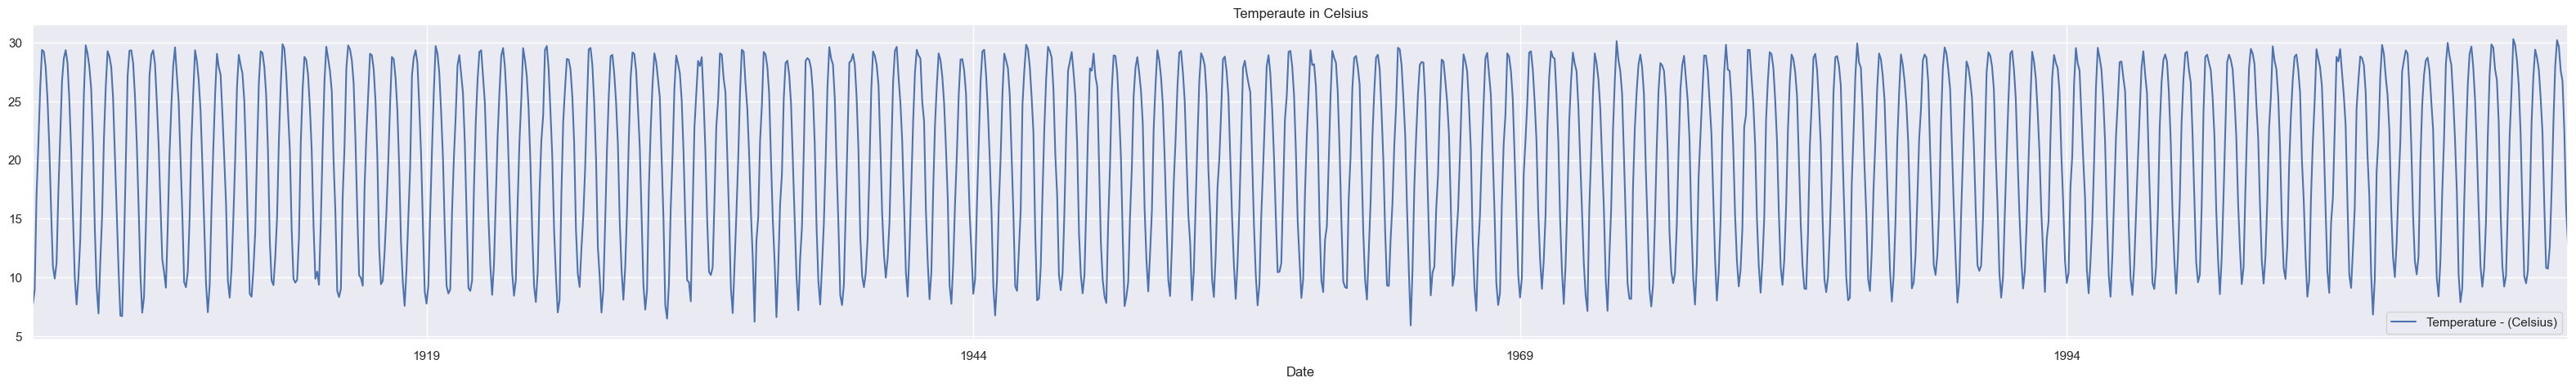

In [18]:
df.plot(figsize= (40,5), title= 'Temperaute in Celsius')
plt.show() 


# Time Series Analysis:

**The QQ Plot:** To check the Distribution, the dataset follows:

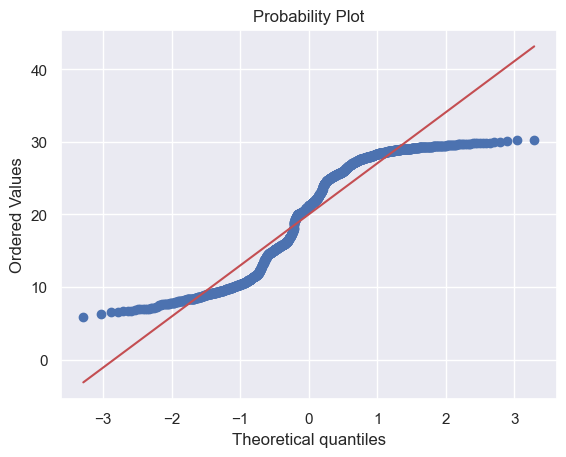

In [19]:
scipy.stats.probplot(df['Temperature - (Celsius)'], plot= pylab)
pylab.show()

Red Line Represent the Normal Distribution and these points are the Prices.

In [20]:
df['Temperature - (Celsius)'].nunique()

1388

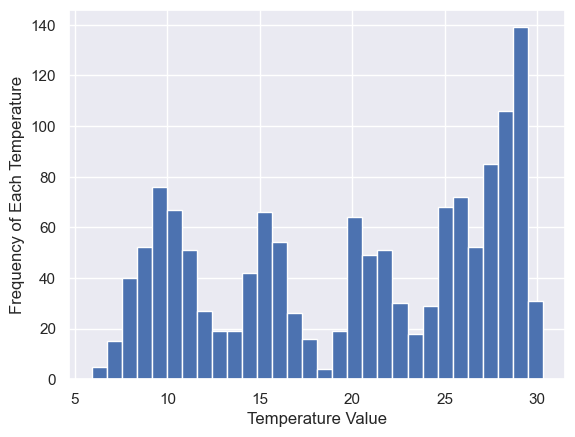

In [21]:
plt.hist(df['Temperature - (Celsius)'],30)
plt.xlabel('Temperature Value')
plt.ylabel('Frequency of Each Temperature')
plt.show()

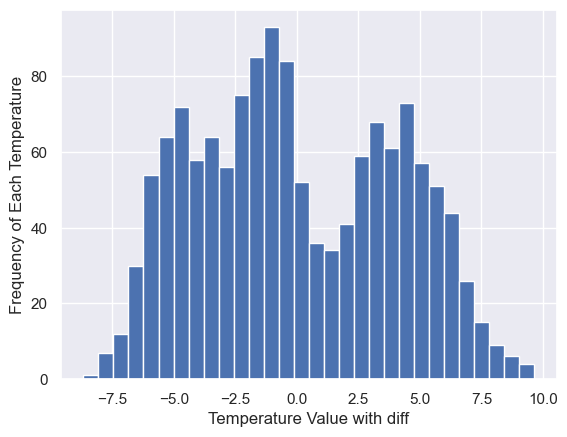

In [22]:
#if we plot diff of the temperature
plt.hist(df['Temperature - (Celsius)'].diff(),30)
plt.xlabel('Temperature Value with diff')
plt.ylabel('Frequency of Each Temperature')
plt.show()

Double Difference:

In [154]:
df['double_diff'] = df['Temperature - (Celsius)'].diff().diff()

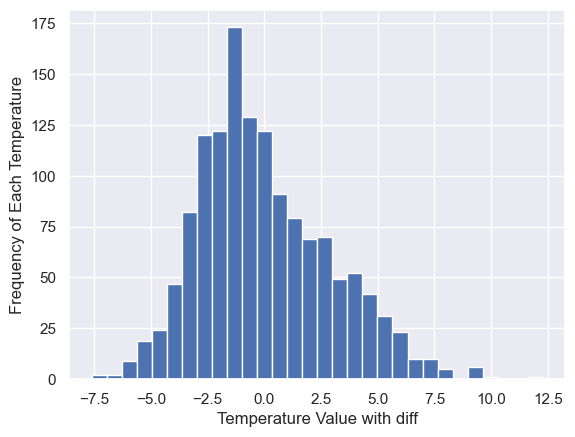

In [155]:
#if we plot diff of the temperature
plt.hist(df['double_diff'],30)
plt.xlabel('Temperature Value with diff')
plt.ylabel('Frequency of Each Temperature')
plt.show()

The histogram of the untransformed data (top) is extremely wide and does not show a normal distribution. This is to be expected given that the underlying data has a trend. We difference the data to remove the trend, and this transforms the data to a more normally shaped distribution

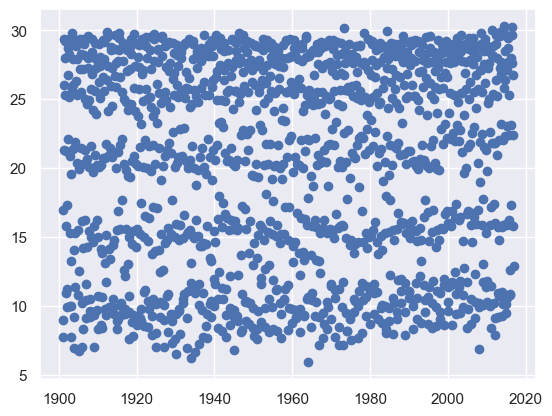

In [23]:
plt.scatter(df.index, df['Temperature - (Celsius)'])
plt.show()

If we scatter plot the differnce of the Temperature values.

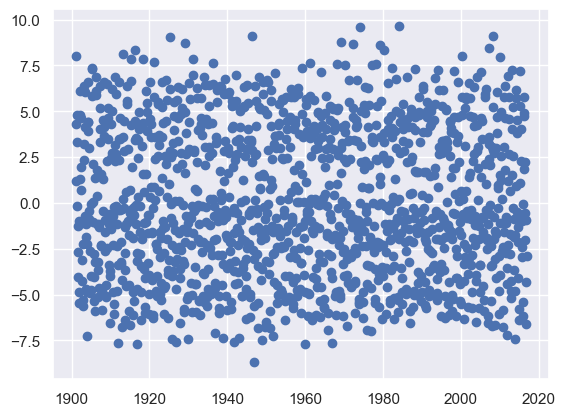

In [24]:
plt.scatter(df.index, df['Temperature - (Celsius)'].diff())
plt.show()

**Stationarity:**

In [25]:
#using augmented dickey fuller test
sts.adfuller(df['Temperature - (Celsius)'])

(-3.791598778074905,
 0.002994449601225075,
 23,
 1368,
 {'1%': -3.435139190725917,
  '5%': -2.8636550704859007,
  '10%': -2.5678960623995417},
 3898.2404277089518)

-3.79<any valye in Significance levels dictionary so, We Reject Null Hypothesis and so Data is Stationer.

In [164]:
df.isna().sum()

Temperature - (Celsius)    0
Year                       0
Month                      0
double_diff                2
dtype: int64

**Seasonality:**

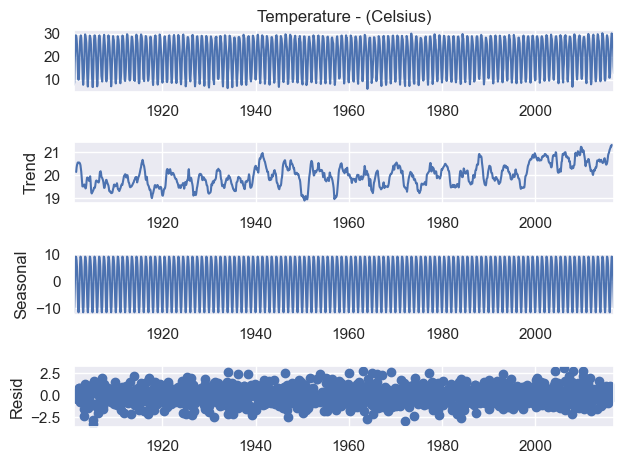

In [26]:
seasonal_decomposition_additive= seasonal_decompose(df['Temperature - (Celsius)'], model= 'additive')
#plotting
seasonal_decomposition_additive.plot()
plt.show()

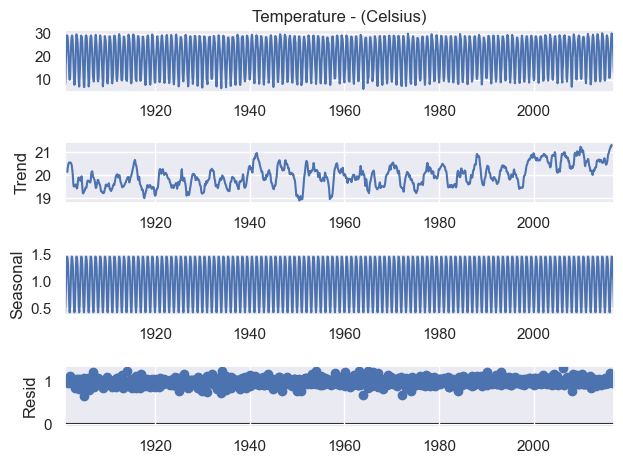

In [27]:
seasonal_decomposition_additive= seasonal_decompose(df['Temperature - (Celsius)'], model= 'multiplicative')
#plotting
seasonal_decomposition_additive.plot()
plt.show()

**Auto-Correlation:**

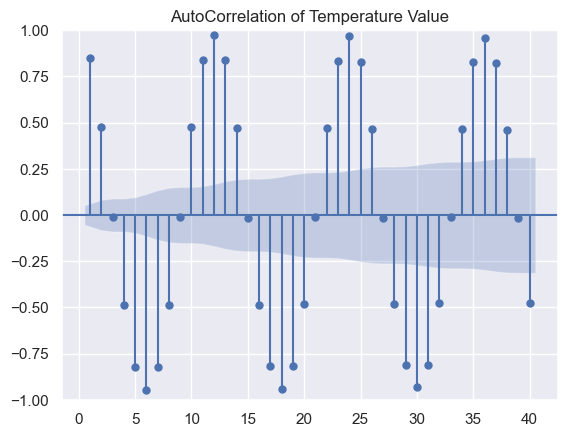

In [28]:
sgt.plot_acf(df['Temperature - (Celsius)'], lags= 40, zero= False)

plt.title('AutoCorrelation of Temperature Value')
plt.show()

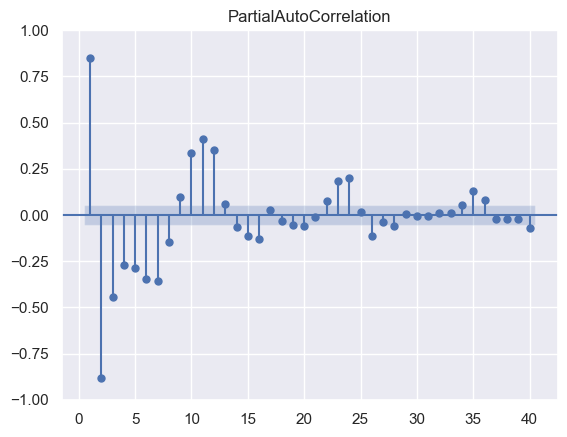

In [29]:
sgt.plot_pacf(df['Temperature - (Celsius)'], lags= 40, zero= False, method=('ols'))
plt.title('PartialAutoCorrelation')
plt.show()

# Time Series Forecasting:

In [30]:
#our training dataset size will be 90 % and testing dataset size will be 10%
#to get a point unitl 90%
training_size= int(len(df) * 0.9)

In [31]:
#now using that point
#tarining dataset
df_train= df.iloc[:training_size]

#testing dataset
df_test= df.iloc[training_size:]

### ARIMA Model:

Selecting Order of (12,0,1) Becuase:
        
        -p=12: In autocorrelation graph we have most significant autocorrelated value with current at 12 period.
        
        -d=0 As data is stationer so we do not need to do difference to make it stationer.
        
        -q= 1 In Partial Autocorrelation graph we have most significant correlated value at Time Period 1.

In [70]:
ar_model= ARIMA(df_train['Temperature - (Celsius)'], order= (2,0,6))

In [71]:
ar_results= ar_model.fit()

#### Forecasting on the Test Data:

Forecast function just make those rays/predict values for future date.

In [72]:
test_set_forecast = ar_results.forecast(len(df_test))


In [73]:
test_set_forecast

2005-05-01    25.888649
2005-06-01    28.715264
2005-07-01    29.679360
2005-08-01    28.237597
2005-09-01    24.199460
                ...    
2016-08-01    27.907243
2016-09-01    23.978701
2016-10-01    18.964707
2016-11-01    14.209422
2016-12-01    10.987196
Freq: MS, Name: predicted_mean, Length: 140, dtype: float64

In [74]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df_test['Temperature - (Celsius)'], test_set_forecast[:418])
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 2.870688539790045


In [75]:
import plotly.graph_objects as go

def plot_forecasts(forecasts: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_train.index, y=df_train['Temperature - (Celsius)'], name='Train_set'))
    fig.add_trace(go.Scatter(x=df_test.index, y=df_test['Temperature - (Celsius)'], name='Test_set'))
    fig.add_trace(go.Scatter(x=test_set_forecast.index, y=test_set_forecast, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Inflation Rate')

    return fig.show()


# Plot the forecasts
plot_forecasts(test_set_forecast, 'ARIMA')

As you can It is forecasting quite Impressively on the test data except missing some dips.

### AR Model:

Basically We will make q=0 (which is MA part and our model will become AR model)

As in PACF we have most significant lag 12 so we will use it:

In [118]:
ar_12_model= ARIMA(df_train['Temperature - (Celsius)'], order= (12,0,0))

In [119]:
ar_12_results= ar_12_model.fit()

In [120]:
test_set_forecast = ar_12_results.forecast(len(df_test))


In [121]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df_test['Temperature - (Celsius)'], test_set_forecast[:418])
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 2.270051845622894


In [122]:
import plotly.graph_objects as go

def plot_forecasts(forecasts: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_train.index, y=df_train['Temperature - (Celsius)'], name='Train_set'))
    fig.add_trace(go.Scatter(x=df_test.index, y=df_test['Temperature - (Celsius)'], name='Test_set'))
    fig.add_trace(go.Scatter(x=test_set_forecast.index, y=test_set_forecast, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Inflation Rate')

    return fig.show()


# Plot the forecasts
plot_forecasts(test_set_forecast, 'AR')

## MA Model:

Now we will use Moving Average Model by not using AR Part of ARIMA(which is p).

        We will use q= 6

In [197]:
MA_12_model= ARIMA(df_train['Temperature - (Celsius)'], order= (0,0,20))

In [198]:
ma_results= MA_12_model.fit()

In [199]:
test_set_forecast = ma_results.forecast(len(df_test))


In [200]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df_test['Temperature - (Celsius)'], test_set_forecast[:418])
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 49.85096429673638


In [201]:
import plotly.graph_objects as go

def plot_forecasts(forecasts: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_train.index, y=df_train['Temperature - (Celsius)'], name='Train_set'))
    fig.add_trace(go.Scatter(x=df_test.index, y=df_test['Temperature - (Celsius)'], name='Test_set'))
    fig.add_trace(go.Scatter(x=test_set_forecast.index, y=test_set_forecast, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Inflation Rate')

    return fig.show()


# Plot the forecasts
plot_forecasts(test_set_forecast, 'MA')

MA model is not fitting well.

## SARIMA Model:

In [188]:
# Defining the order and seasonal_order parameters
#the order will be according to what we choosen in ARIMA
order = (2, 0, 6)  
seasonal_order = (13, 0, 0, 6) 
# Fit the SARIMA model
sarima_model = SARIMAX(df_train['Temperature - (Celsius)'], order=order, seasonal_order=seasonal_order)
result = sarima_model.fit(disp=False)


                                      SARIMAX Results                                       
Dep. Variable:              Temperature - (Celsius)   No. Observations:                 1252
Model:             SARIMAX(2, 0, 36)x(13, 0, [], 6)   Log Likelihood               -1706.425
Date:                              Mon, 27 Nov 2023   AIC                           3516.851
Time:                                      15:00:03   BIC                           3783.740
Sample:                                  01-01-1901   HQIC                          3617.175
                                       - 04-01-2005                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3712     11.601      0.118      0.906     -21.367      24.110
ar.L2         -0.39

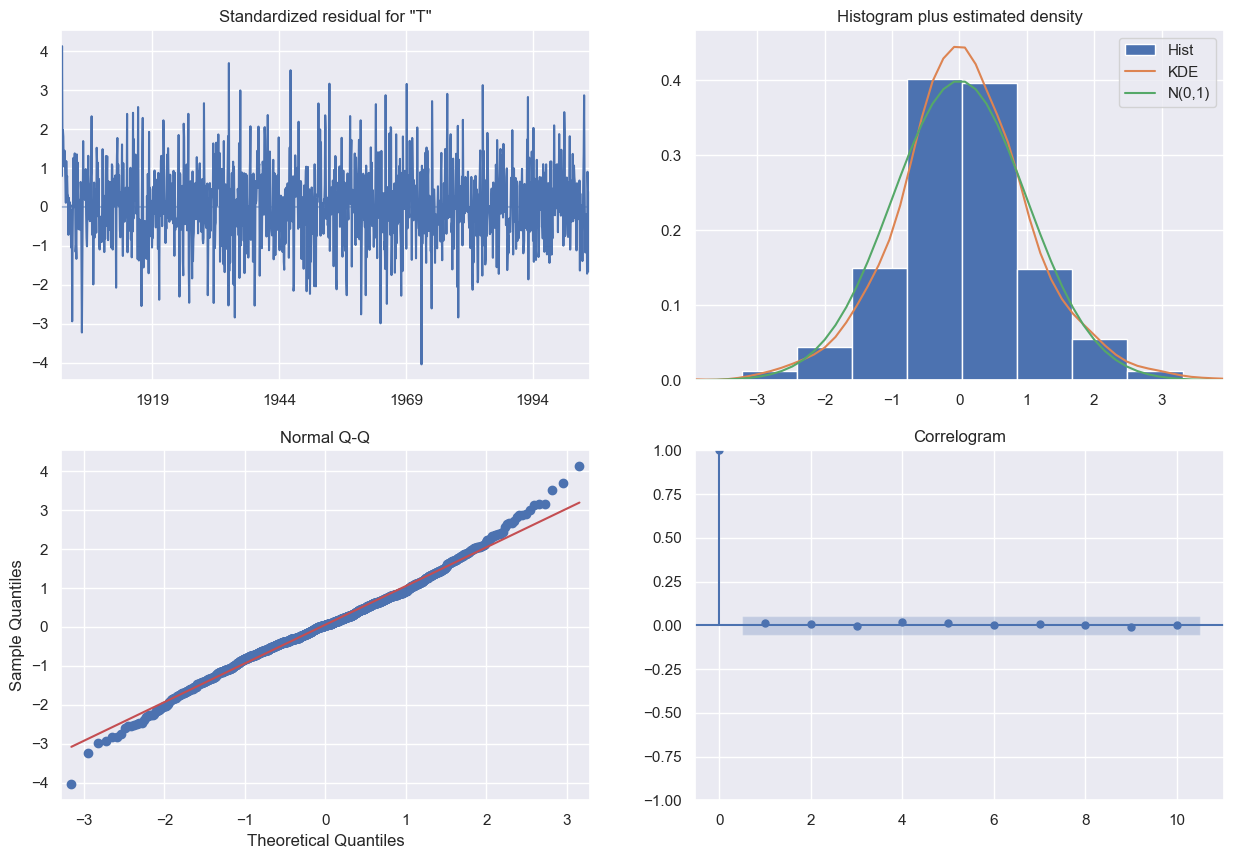

In [189]:
print(result.summary())
result.plot_diagnostics(figsize=(15, 10))
plt.show()


In [190]:
sarima_forecast = result.forecast(len(df_test))
# Calculate Mean Squared Error (MSE)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df_test['Temperature - (Celsius)'], sarima_forecast[:418])
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.0634296969999306


In [191]:
import plotly.graph_objects as go

def plot_forecasts(forecasts: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_train.index, y=df_train['Temperature - (Celsius)'], name='Train_set'))
    fig.add_trace(go.Scatter(x=df_test.index, y=df_test['Temperature - (Celsius)'], name='Test_set'))
    fig.add_trace(go.Scatter(x=df_test.index, y=sarima_forecast, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Infalation Rate')

    return fig.show()


# Plot the forecasts
plot_forecasts(test_set_forecast, 'SARIMA')

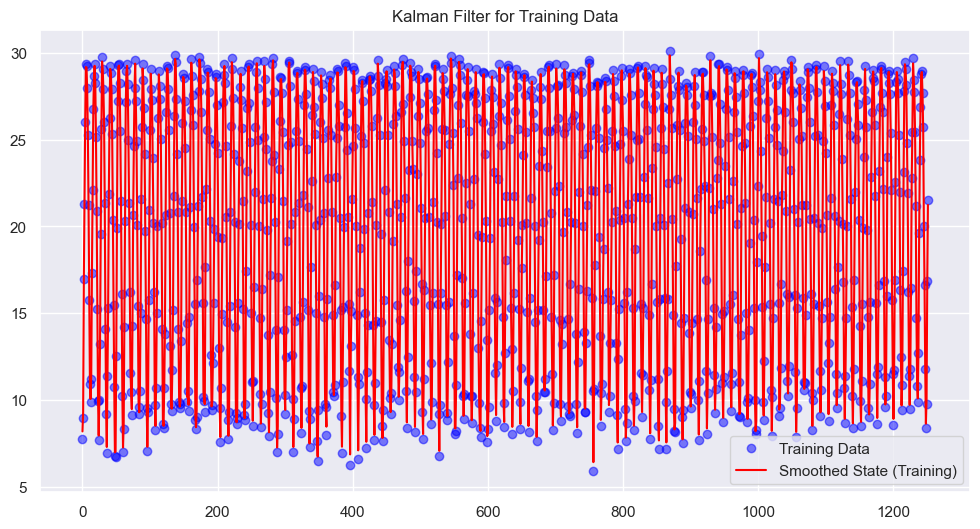

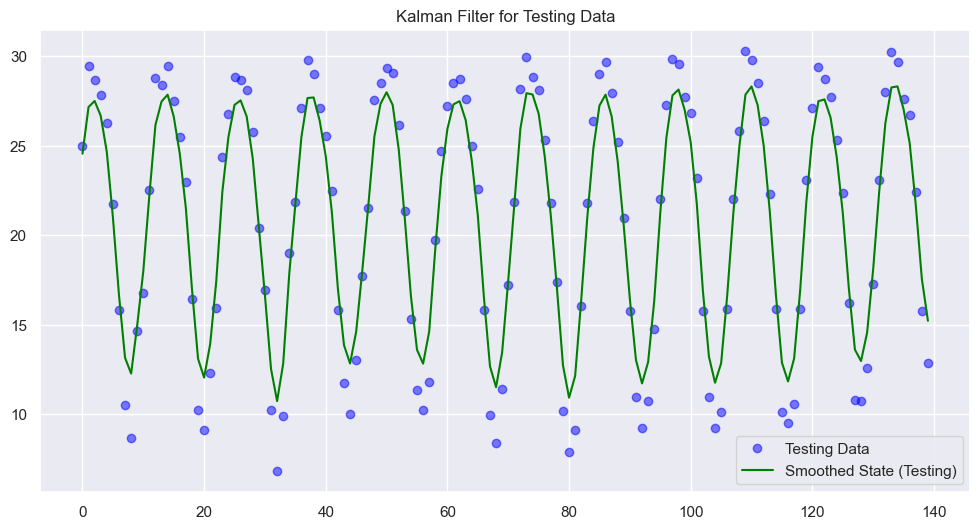

In [192]:
from pykalman import KalmanFilter

# Assuming df_train contains a column 'y' with the training time series data
train_data = df_train['Temperature - (Celsius)'].values

# Apply Kalman filter to training data
kf_train = KalmanFilter(initial_state_mean=train_data[0], n_dim_obs=1)
kf_train = kf_train.em(train_data, n_iter=10)
(smoothed_state_means_train, _) = kf_train.smooth(train_data)

# Plot the results for training data
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data', marker='o', linestyle='None', color='blue', alpha=0.5)
plt.plot(smoothed_state_means_train, label='Smoothed State (Training)', color='red')
plt.title('Kalman Filter for Training Data')
plt.legend()
plt.show()

# Assuming df_test contains a column 'y' with the testing time series data
test_data = df_test['Temperature - (Celsius)'].values

# Apply Kalman filter to testing data using parameters learned from training data
kf_test = KalmanFilter(initial_state_mean=train_data[-1], n_dim_obs=1)
kf_test = kf_test.em(train_data, n_iter=0)  # Use parameters learned from training
(smoothed_state_means_test, _) = kf_test.smooth(test_data)

# Plot the results for testing data
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Testing Data', marker='o', linestyle='None', color='blue', alpha=0.5)
plt.plot(smoothed_state_means_test, label='Smoothed State (Testing)', color='green')
plt.title('Kalman Filter for Testing Data')
plt.legend()
plt.show()
